In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import cross_validate

In [2]:
acc = pd.DataFrame({'Classifiers': ['Naive-Bays', 'SVM', 'NN'],
                      'TF-IDF 300': [0.70, 0.75, 0.74], 
                      'TF-IDF 1000': [0.81, 0.85, 0.80], 
                      'TF-IDF 8000': [0.88, 0, 0.88], 
                      'w2v 80': [0.71,0.86,0.82],
                      'w2v 115': [0.72,0.87,0.83],
                      'w2v 300': [0.73,0.88,0.86],
                      'w2v Google': [0.78,0.88,0.86],
                   })
acc = acc.reindex(columns=['Classifiers', 'TF-IDF 300', 'TF-IDF 1000', 'TF-IDF 8000', 'w2v 80', 'w2v 115', 'w2v 300', 'w2v Google'])

In [3]:
acc

,Classifiers,TF-IDF 300,TF-IDF 1000,TF-IDF 8000,w2v 80,w2v 115,w2v 300,w2v Google
0,Naive-Bays,0.70,0.81,0.88,0.71,0.72,0.73,0.78
1,SVM,0.75,0.85,0.00,0.86,0.87,0.88,0.88
2,NN,0.74,0.80,0.88,0.82,0.83,0.86,0.86


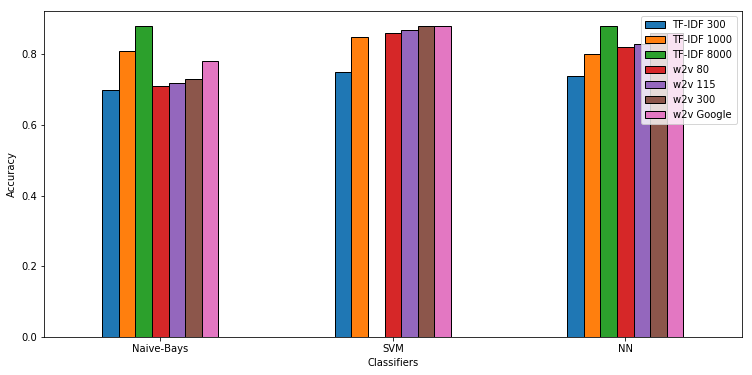

In [4]:
acc.plot.bar(x='Classifiers', rot=0, figsize=(12.5,6), edgecolor='k')
plt.ylabel('Accuracy')
plt.show()

In [5]:
acc2 = acc.T
acc2.columns = acc2.iloc[0]
acc2 = acc2.drop(acc2.index[0])

In [6]:
acc2

Classifiers,Naive-Bays,SVM,NN
TF-IDF 300,0.7,0.75,0.74
TF-IDF 1000,0.81,0.85,0.8
TF-IDF 8000,0.88,0,0.88
w2v 80,0.71,0.86,0.82
w2v 115,0.72,0.87,0.83
w2v 300,0.73,0.88,0.86
w2v Google,0.78,0.88,0.86


In [24]:
# plt.rcParams.update({'font.size': 26, 'mathtext.fontset':'stix', 'font.family':'STIXGeneral'})
plt.rcParams.update({'font.size': 14})

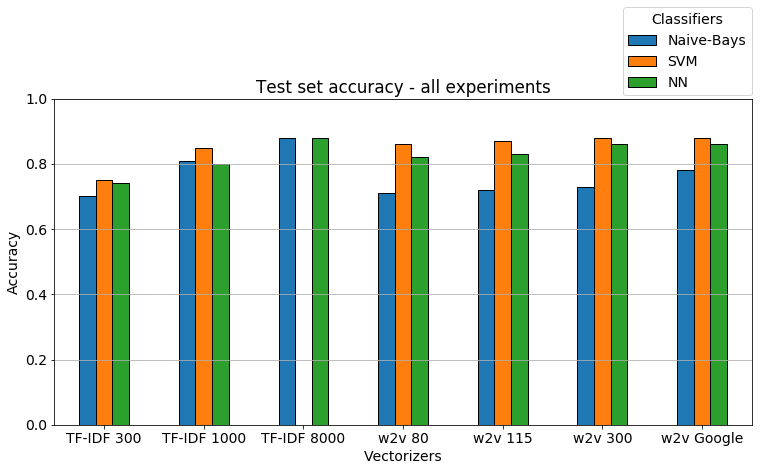

In [34]:
acc2.plot.bar( rot=0, figsize=(12.5,6), edgecolor='k')

plt.title('Test set accuracy - all experiments')
plt.xlabel('Vectorizers')
plt.ylabel('Accuracy')
plt.legend(loc=(0.815,1.01), title='Classifiers')
plt.grid(axis='y')
plt.ylim(0,1)
plt.show()

In [40]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
y = np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5])

In [51]:
x = np.array([1,1,1,1,1,2,2,2,2,2,3,3,3,4,3,4,3,4,4,4,5,5,5,5,5])

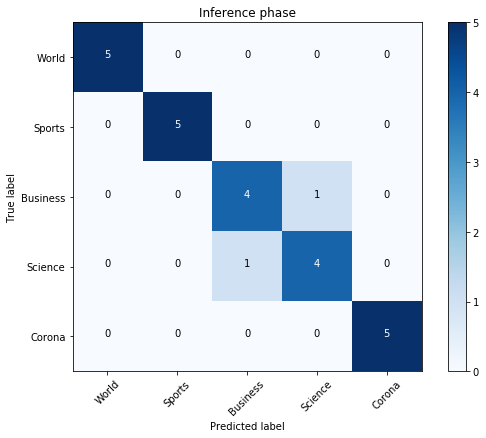

In [54]:
nb_cm = confusion_matrix(y, x)
cmPlotLabels = ['World', 'Sports', 'Business', 'Science', 'Corona']
plot_confusion_matrix(nb_cm, cmPlotLabels, title='Inference phase')